In [2]:
!pip install corner

  Created wheel for corner: filename=corner-2.0.1-py3-none-any.whl size=11647 sha256=01c49af4562c58d5d0ceb6af668b788743750e054d66140e925ad97e90e12014
  Stored in directory: c:\users\dave mont\appdata\local\pip\cache\wheels\50\3c\47\bf0d81844cff733f961144f87a2ebded228055a9731a17d8f5
Successfully built corner


In [40]:
import numpy as np
import matplotlib.pyplot as plt
import emcee
import corner

In [41]:
path = "C:/Users/Dave Mont/Desktop/Master_of_DataScience/DL-fisica/3 Parametros Cosmologicos/cosmo_mcmc-20200422T170809Z-001/cosmo_mcmc/"
filename = path + 'chains/test.chains'
name = '004'

burnin = 500
thin = 1

pname = ['A_s', 'n_s', 'r']

In [42]:
reader = emcee.backends.HDFBackend(filename, name=name, read_only=True)
samples = reader.get_chain(discard=burnin, thin=thin, flat=True)

ndim = samples.shape[1]
print('number of samples =', samples.shape[0])

number of samples = 31000


In [43]:
lnpos = reader.get_log_prob(discard=burnin, flat=True)
bf = samples[np.argmax(lnpos),:]

print('best fit = ', bf)

best fit =  [1.01952359 0.18170604]


In [44]:
means = []
stds = []
for i in range(ndim):
    means.append(np.mean(samples[:,i]))
    stds.append(np.std(samples[:,i]))

for i in range(ndim):
    print('%s = %f +- %f' % (pname[i], means[i], stds[i]))

A_s = 1.019368 +- 0.002869
n_s = 0.185357 +- 0.049365


In [45]:
per = [2.5, 16., 50., 84., 97.5]
for i in range(ndim):
    print(pname[i]+': ', np.percentile(samples[:,i], per, axis=0))

A_s:  [1.01377498 1.01651887 1.01930661 1.02220792 1.02509772]
n_s:  [0.09032054 0.13692354 0.18450576 0.23429941 0.28606864]


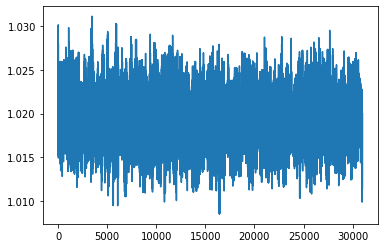

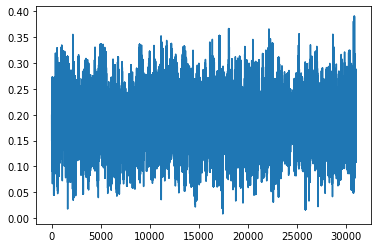

In [46]:
for i in range(samples.shape[1]):
    plt.plot(samples[:,i])
    plt.show()

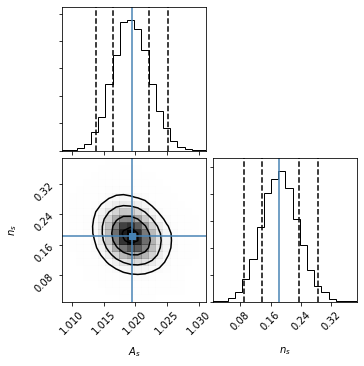

In [47]:
corner.corner(samples, labels=('$A_s$', '$n_s$', '$r$'), quantiles=(0.025, 0.16, 0.84, 0.975), 
              truths=bf, plot_datapoints=False, smooth=1.)
plt.show()